<a href="https://colab.research.google.com/github/sravanjosh07/Self_Driving_cars-Udemy/blob/master/multiclass_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.utils.np_utils import to_categorical


In [13]:
n_pts = 500
center = [[-1,1], [-1,-1], [1,-1], [1,1], [0,0]]
X, y = datasets.make_blobs(n_samples= n_pts, centers = center, cluster_std= 0.4, random_state= 3, )


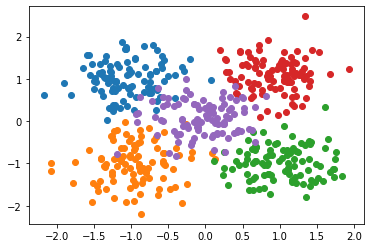

In [14]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [15]:
print(y)
y_cat = to_categorical(y,5)
print(y_cat)



[1 0 2 0 2 1 3 2 1 4 2 3 3 2 2 1 3 0 3 1 2 0 1 1 4 0 2 4 4 0 3 2 3 3 4 2 2
 3 0 4 1 4 1 0 2 2 2 1 3 3 3 0 2 1 2 1 2 4 1 3 0 1 2 3 3 0 4 0 4 2 4 0 0 4
 0 2 1 4 1 2 2 3 0 1 0 1 0 2 4 3 0 0 1 3 4 1 4 1 2 1 2 3 3 0 1 1 0 4 4 1 4
 3 0 2 2 3 1 4 3 4 3 2 1 1 2 4 2 2 1 4 1 3 3 0 1 3 4 3 4 4 2 1 3 3 1 4 2 0
 0 4 1 1 0 3 4 0 2 0 3 0 0 0 4 3 0 2 0 4 2 1 4 1 3 2 0 4 3 0 2 1 2 0 4 4 2
 3 0 1 4 4 3 4 0 0 3 2 4 3 2 2 3 4 3 0 1 4 3 3 4 1 4 3 0 3 1 3 1 2 0 1 1 3
 0 3 0 1 2 1 0 0 2 3 3 1 1 0 0 3 4 2 4 3 4 2 4 3 4 2 0 2 3 0 2 3 4 1 2 2 2
 4 4 4 1 0 0 4 1 1 3 1 4 1 2 2 3 3 0 3 3 2 0 3 1 0 1 4 1 1 2 3 0 2 0 0 3 3
 0 1 0 4 3 3 1 2 0 3 4 0 1 4 2 3 4 0 4 1 1 0 0 0 3 3 0 3 4 1 1 4 2 2 1 1 3
 0 0 0 3 4 2 3 4 0 2 2 1 0 0 4 4 4 1 1 1 4 4 3 0 1 4 3 2 3 2 3 3 4 4 2 0 2
 1 3 3 2 2 0 2 0 4 1 2 4 3 2 1 0 4 3 3 3 4 2 0 2 2 2 4 0 1 2 1 1 4 1 3 1 3
 2 0 0 3 2 3 0 1 2 1 4 4 2 4 1 4 2 4 1 4 3 0 0 4 0 2 0 0 4 3 3 1 0 1 4 2 1
 2 3 0 1 3 1 3 3 0 3 0 2 2 1 3 3 4 4 2 4 2 4 2 2 2 1 0 4 1 2 1 1 4 1 4 0 0
 4 2 1 2 4 0 2 4 2 4 0 4 

In [16]:
model = Sequential()
model.add(Dense(5, input_shape = (2,), activation= 'softmax'))
model.compile(Adam(lr=0.1), 'categorical_crossentropy', metrics = ['accuracy'])


In [17]:
h = model.fit(X,y_cat, verbose= 1, epochs=100, batch_size=50)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 1.2590 - accuracy: 0.4734
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6178 - accuracy: 0.8369
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.9282
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3230 - accuracy: 0.9362
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2884 - accuracy: 0.9360
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2484 - accuracy: 0.9459
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2199 - accuracy: 0.9542
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2471 - accuracy: 0.9306
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9511
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9557
Epoch 11/

In [18]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.5, max(X[:,0]) + 0.5)
    y_span = np.linspace(min(X[:,1]) - 0.5, max(X[:,1]) + 0.5)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction is : [3]


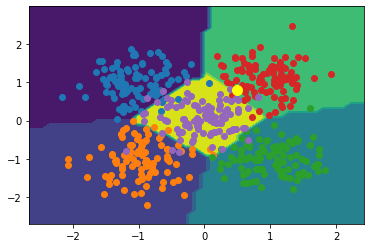

In [24]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

a = 0.5
b = 0.8
point = np.array([[a, b]])
prediction = model.predict_classes(point)
plt.plot([a],[b], color = 'yellow', marker = 'o', markersize = 10)
print("Prediction is :", prediction )

